In [35]:
# from http://dspace.ut.ee/bitstream/handle/10062/57948/jarvsoo_johanna_adele_2017.pdf
import numpy as np
import matplotlib.pyplot as plt

In [36]:
mu0=0.1
sigmaruut0=10
#the expectations of he noises V and W
muv=0
muw=0
#the length of time period
T=50
a=1
c=1

In [37]:
def g(z):
    return 0.5*z + 25*z/(1+z**2) 

def h(z):
    return 0.05*z**2

In [41]:
def KF(Q,R):
    mu = np.zeros((T+1, T+1))
    mu[0, 0]=mu0
    sigmaruut = np.zeros((T+1, T+1))
    sigmaruut[0, 0]=sigmaruut0
    
    z = np.zeros(T+1)
    y = np.zeros(T+1)
    z[0] = 0.1
    y[0] = 0.05*z[0]**2 + np.random.normal(0, np.sqrt(R))
    for k in range(0,T):
        z[k+1] = 0.5*z[k] + 25*z[k]/(1+z[k]**2) + 8*np.cos(1.2*k) + np.random.normal(0, np.sqrt(Q))
        y[k+1] = 0.05*z[k+1]**2 + np.random.normal(0, np.sqrt(R))
    
    # KF algorithm
    for i in range(0,T):
        # predict step
        mu[i+1,i] = a*mu[i,i]
        sigmaruut[i+1,i] = a**2*sigmaruut[i,i] + Q
        # measurement step
        Kt = sigmaruut[i+1,i]*c*(1/(c**2*sigmaruut[i+1,i]+R))
        mu[i+1,i+1] = mu[i+1, i] + Kt*(y[i] - c*mu[i,i-1])
        sigmaruut[i+1,i+1] = (1-Kt*c)*sigmaruut[i+1,i]
    
    return z, y, mu.diagonal()

In [42]:
def jon(z,y,mu,Qt,Rt):
    plt.plot(t, mu, label=r"KF␣$\tilde{\mu}_t$")
    plt.plot(t, z, label=r"$z_t$")
    plt.xlabel('time')
    plt.ylabel('state␣value')
    plt.title (r"$Q_t=$"+str(Qt)+r",␣$R_t=$"+str(Rt))
    plt.plot(t, y, 'x', label=r"$y_t$")
    #plt.ylim([-10,30])
    plt.legend(loc='best')

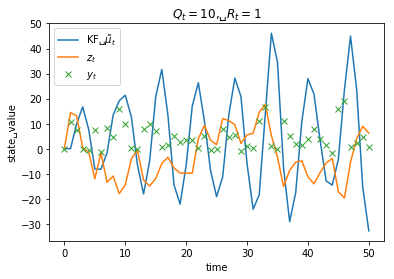

In [44]:
z,y,mu=KF(10,1)
t = range(0,T+1)
jon(z,y,mu,10,1)